In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
def bedtopo(L,*args):  #bed to topography L- length of glacier
    b0 = args[0]   #b0: glacier start point
    bx = args[1]   #bx: glacier slope
    sillmin = args[2]   #start of reverse slope
    sillmax = args[3]   #end of reverse slope
    sillslope = args[4]   #slope of reverse slope
    
    if L < sillmin: #if glacier is shorter than reverse slope
        b = b0 + bx*L
    elif L < sillmax: #if glacier terminates on reverse slope
        b = b0 + bx*sillmin + sillslope*(L-sillmin)
    else: #if glacier terminates after reverse slope
        b = b0 + bx*sillmin + sillslope*(sillmax-sillmin) + bx*(L-sillmax)
        
    return b

In [49]:
data = pd.read_csv("/Users/loganknudsen/Documents/GitHub/StormSurge/Experiment_Data/data_single_cases_analysis/projections/projection_smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv").set_index("t")

In [50]:
dataHL = data[["aH","aL"]].loc[[(2020+i/4) for i in range(4*280+1)]]

In [51]:
Q_data = pd.DataFrame(columns=["Q","Q_g"])
for ind,row in dataHL.iterrows():
    Hnd = row['aH']
    Lnd = row['aL']
    b0 = 0
    bx = -0.001
    sillmin = 415e3
    sillmax = 425e3
    sillslope = 0.01
    rhow = 1028   #density of water
    rhoi = 917   #denisty of ice
    n = 3   
    beta = 4.75 
    Lscale = 100e3   #scale for length, it is on the order of 10E4 or 1E5
    Hscale = 1000  #scale for thickness, it is on the order of 10E2 or 1E3
    gamma = 0.05
    omega = 8e-8
    
    H = Hnd*Hscale #icethickness
    L = Lnd*Lscale #length of glacier

    #see below for write out of the functions in mathematical notation
    hg = -(rhow/rhoi)*bedtopo(L,b0,bx,sillmin,sillmax,sillslope)   # #1
    Q = gamma * (H**(2*n + 1))/(L**n)   # #2
    Qg = omega * ((hg)**beta)   # #3
    Q_data = Q_data.append({'t':ind,'Q': Q,'Q_g': Qg}, ignore_index=True)
    

<AxesSubplot:>

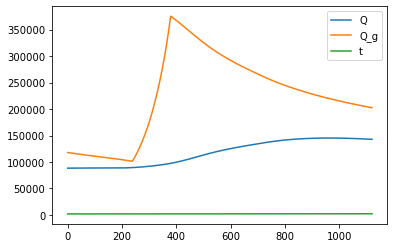

In [52]:
Q_data.plot()

In [53]:
vol_data = pd.DataFrame(columns=["V"])
W = 5*1e3
for ind,row in Q_data.iterrows():
    Q = row["Q"]
    Qg = row["Q_g"]
    dV = W*(Q-Qg)
    V = 0.25*np.abs(dV)
    vol_data = vol_data.append({'t':ind/4+2020,'V':V}, ignore_index=True)

<AxesSubplot:>

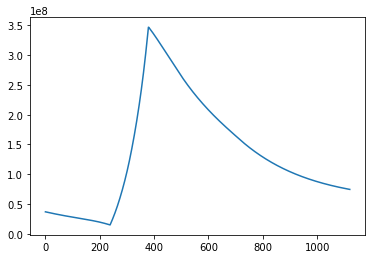

In [54]:
vol_data['V'].plot()

<AxesSubplot:>

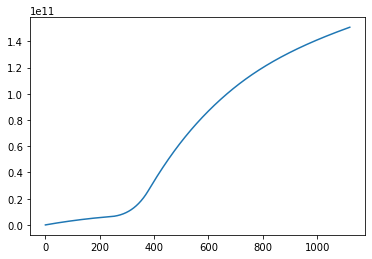

In [55]:
vol_data['V_sum'] = vol_data['V'].cumsum()
vol_data['V_sum'].plot()

<AxesSubplot:>

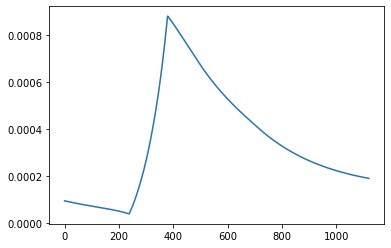

In [56]:
vol_data["sea_level"] = (vol_data['V']*1e-9)/(394.67)
vol_data['sea_level'].plot()

<AxesSubplot:>

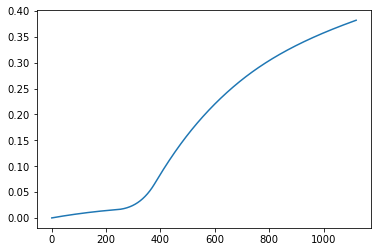

In [57]:
vol_data['sea_level_cumulative'] = vol_data['sea_level'].cumsum()
vol_data['sea_level_cumulative'].plot()

In [58]:
sea_level_data = vol_data.set_index("t")
sea_level_data.to_csv(f"/Users/loganknudsen/Documents/GitHub/StormSurge/Experiment_Data/data_single_cases_analysis/sea_level_rise_projections/w{W/1000}km_smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv")

In [59]:
data2 = pd.read_csv("/Users/loganknudsen/Documents/GitHub/StormSurge/Experiment_Data/data_single_cases_analysis/sea_level_rise_projections/w5.0km_smbt11950smbtf2300smb00.3smb10.15smbf0.0sillmin415sillmax425sillslope0.01hnd2.18lnd4.44bx-0.001.csv")

In [60]:
data2.iloc[-1]

t                       2.300000e+03
V                       7.453902e+07
V_sum                   1.507150e+11
sea_level               1.888642e-04
sea_level_cumulative    3.818761e-01
Name: 1120, dtype: float64